# 5 Matplotlibを使ったデータ可視化

＜章トビラ＞

この章では、2章で基礎を学んだMatplotlibについて、さらに深く学びます。2章では折れ線グラフやヒストグラムを扱いましたが、ここでは棒グラフや円グラフ、バブルチャートの作成方法について学びます。

そして、この章の最後に今までの総合問題として、時系列データの分析とマーケティングの分析の問題を用意しています。これまで学んだ手法を試せる機会ですので、ぜひチャレンジしてみてください。

ゴール：Matplotlibを使って、さまざまなデータを可視化することができる。この章の総合問題が解ける。

- **[5.1 データの可視化](#5.1-データの可視化)**
    - [5.1.1 データの可視化について](#5.1.1-データの可視化について)
    - [5.1.2 この章で使うライブラリのインポート](#5.1.2-この章で使うライブラリのインポート)
<br><br>
- **[5.2 データ可視化の基礎](#5.2-データ可視化の基礎)**
    - [5.2.1 棒グラフ](#5.2.1-棒グラフ)
    - [5.2.2 円グラフ](#5.2.2-円グラフ)
<br><br>
- **[5.3 応用：金融データの可視化](#5.3-応用：金融データの可視化)**
    - [5.3.1 可視化する金融データ](#5.3.1-可視化する金融データ)
    - [5.3.2 ローソクチャートを表示するモジュール](#5.3.2-ローソクチャートを表示するモジュール)
<br><br>
- **[5.4 応用：分析結果の見せ方を考えよう](#5.4-応用：分析結果の見せ方を考えよう)**
    - [5.4.1 資料作成のポイントについて](#5.4.1-資料作成のポイントについて)
<br><br>
- **[5.5 総合問題](#5.5-総合問題)**
    - [5.5.1 ■総合問題5-1 時系列データ分析](#■総合問題5-1-時系列データ分析)
    - [5.5.2 ■総合問題5-2 マーケティング分析](#■総合問題5-2-マーケティング分析)

***

## 5.1 データの可視化


### 5.1.1 データの可視化について
2章の冒頭でも触れた通り、データを可視化することで、さまざまな示唆を得ることができます。単に数字をみているだけでは得られない発見もありますし、図にすることで、データに対する理解がより深まります。また、データ分析の結果を相手に説明する場合も、可視化は重要です。さまざまな数値を比較してそれらの数値だけ見せるよりは、それらを棒グラフや円グラフにして見せるほうが、相手にとっても理解がしやすいはずです。ここでは、データの可視化をするための手法や見せ方のポイントを紹介します。


### 5.1.2 この章で使うライブラリのインポート

この章では、2章で紹介した各種ライブラリを使います。次のようにインポートしていることを前提として、以下、進めていきます。

In [1]:
# 以下のライブラリを使うので、あらかじめ読み込んでおいてください
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

# 小数第３位まで表示
%precision 3

'%.3f'

## 5.2 データ可視化の基礎
キーワード：棒グラフ、円グラフ、バブルチャート、積み上げグラフ

ここでは、データを可視化するMatplotlibについてもう少し詳しく学んでいきましょう。これまで折れ線グラフ、ヒストグラムなどのグラフを使ってきました。ここでは、棒グラフや円グラフ、積み上げグラフなどについても紹介していきます。

### 5.2.1 棒グラフ

まずは、棒グラフからです。これは、カテゴリーごと（地域別、部門別など）に数値を比較したいときに使います。棒グラフを表示するには、pyplotモジュールの`bar`関数を使います。棒にラベルを表示したいときは、`xtick`関数を使って以下のように指定します。

また、そのまま実行するとグラフが左に寄ってあまり見栄えが良くないので、グラフを中央に寄せるために、`align = 'center'`パラメータを指定するとよいでしょう。$x$のラベルや$y$のラベルの付け方は、2章で説明した通りです。

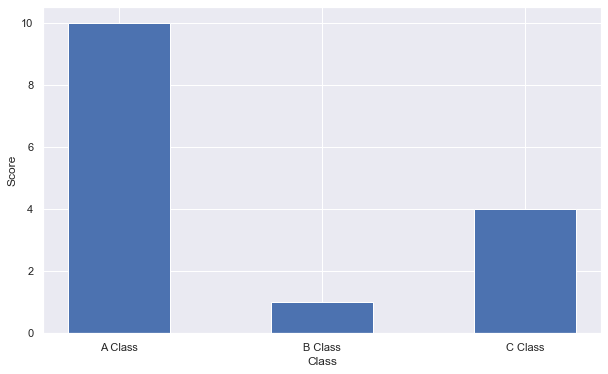

In [2]:
# 表示するデータ
x = [1, 2, 3]
y = [10, 1, 4]

# グラフの大きさ指定  
plt.figure(figsize = (10, 6))

plt.bar(x, y, align='center', width = 0.5)

# 棒グラフそれぞれのラベル
plt.xticks(x, ['A Class', 'B Class', 'C Class'])

# xとyのラベルを設定
plt.xlabel('Class')
plt.ylabel('Score')

# グリッドを表示
plt.grid(True)

#### 横の棒グラフ
先ほどは縦の棒グラフでしたが、横にしたい場合は、`barh`関数を使います。なお、$x$の軸と$y$の軸が入れかわるので、ラベルを再設定しています。

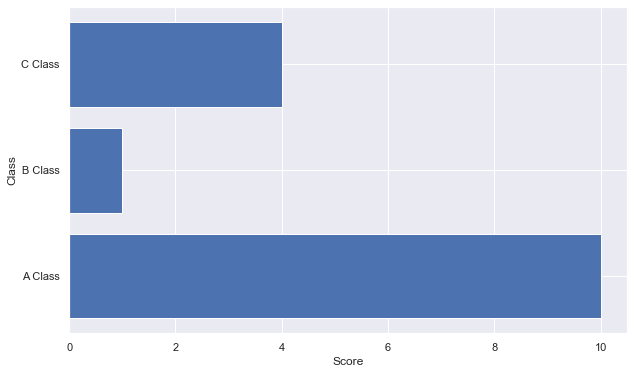

In [3]:
# 表示するデータ
x = [1, 2, 3]
y = [10, 1, 4]

# グラフの大きさ指定 
plt.figure(figsize = (10, 6))

plt.barh(x, y, align = 'center')
plt.yticks(x, ['A Class','B Class','C Class'])
plt.ylabel('Class')
plt.xlabel('Score')
plt.grid(True)

#### 複数のグラフを描く

次に複数の棒グラフを描き、それぞれ比較してみましょう。以下は、クラスごとに数学の一期目の成績と最終成績をそれぞれグラフ化し、比較できるようにしたものです。

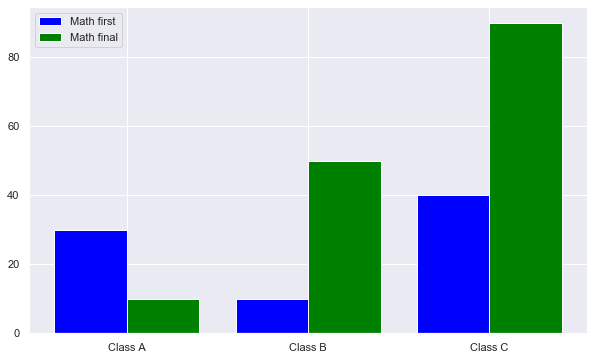

In [4]:
# データの準備
y1 = np.array([30, 10, 40])
y2 = np.array([10, 50, 90])

# X軸のデータ
x = np.arange(len(y1))

# グラフの幅
w = 0.4

# グラフの大きさ指定
plt.figure(figsize = (10, 6))

# グラフの描画。y2の方はグラフの幅の分、右にずらして描画する 
plt.bar(x, y1, color = 'blue', width = w, label = 'Math first', align = 'center')
plt.bar(x + w, y2, color='green', width = w, label = 'Math final', align = 'center')

# 凡例を最適な位置に配置
plt.legend(loc = 'best')

plt.xticks(x + w / 2, ['Class A', 'Class B', 'Class C'])
plt.grid(True)

#### 積み上げ棒グラフ

次に示すのは、積み上げの棒グラフの例です。同じく`bar`関数を使っていますが、`bottom`パラメータの設定に注目してください。上に積む方のグラフで、`bar`のパラメータとしてbottom=＜下に積むグラフ＞を指定します。

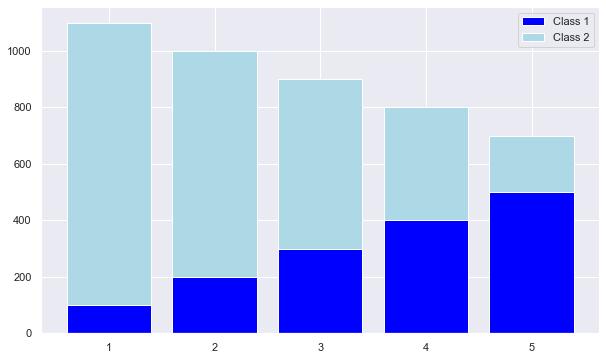

In [5]:
# データの準備
height1 = np.array([100, 200, 300, 400, 500])
height2 = np.array([1000, 800, 600, 400, 200])

# X軸
x = np.array([1, 2, 3, 4, 5]) 

# グラフの大きさ指定 
plt.figure(figsize = (10, 6))

# グラフの描画
p1 = plt.bar(x, height1, color = 'blue')
p2 = plt.bar(x, height2, bottom = height1, color='lightblue')

# 凡例を表示 
plt.legend((p1[0], p2[0]), ('Class 1', 'Class 2'))

なお、すでに説明していますが、関数のパラメータ等は、`help`関数を使うと調べられます。

In [6]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Place a legend on the axes.
    
    Call signatures::
    
        legend()
        legend(labels)
        legend(handles, labels)
    
    The call signatures correspond to three different ways how to use
    this method.
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line.set_label('Label via method')
        line, = ax.plot([1, 2, 3])
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    selection by defining a label st

### 5.2.2 円グラフ
次に、円グラフの描き方を説明します。これは、全体に対する割合が各々どれくらいあるのか見るときに使います。

#### 一般的な円グラフ
円グラフを描くには`pie`関数を使って、それぞれのサイズやラベル等を設定します。`axis`関数で円グラフを丸く表示するように調整します。`autopct`パラメータでそれぞれの割合を表示する書式を指定します。また`explode`パラメータを指定すると、特定のカテゴリーだけ、円グラフの全体から離す調整ができます（ここでは、`Hogs`だけ0.1に設定しています）。

`startangle`パラメータは、各要素の出力を開始する角度を表します。このパラメータを指定することで、出力開始位置を変更でき、「90」と指定すると上部中央が開始位置になります。反時計回りの方向に変更したい場合は正の値、時計回りに変更したい場合は負の値を指定します。

出力する向きは`counterclock`パラメータで指定します。`True`または指定しない場合は時計回りに、`False`と指定すると反時計回りに出力されます。


(-1.2142507666786346,
 1.134711077927507,
 -1.1258468317413044,
 1.101230806657754)

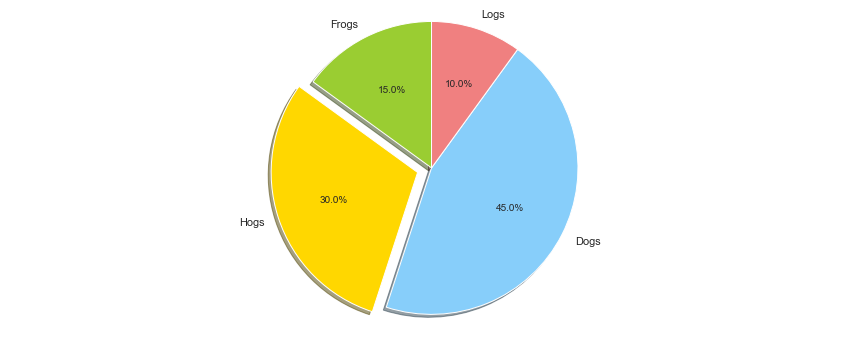

In [7]:
import matplotlib.pyplot as plt

labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0) 

# グラフの大きさ指定
plt.figure(figsize = (15, 6))

# グラフを表示
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)

# 円を丸く描画
plt.axis('equal')

`pie`関数のパラメータも、次のように`help`関数で確認できます。

In [ ]:
help(plt.pie)

#### バブルチャート
次に`scatter`関数を使って、バブルチャートを作成してみます。

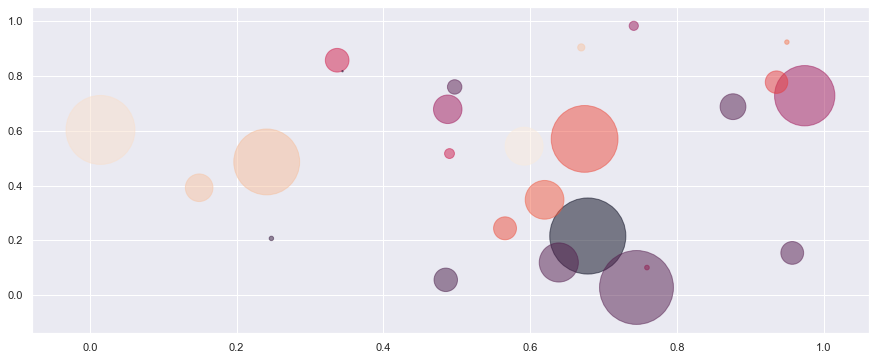

In [8]:
import numpy as np
import matplotlib.pyplot as plt

N = 25

# X,Yデータをランダムに生成 
x = np.random.rand(N)
y = np.random.rand(N)

# color番号
colors = np.random.rand(N)

# バブルの大きさをばらけさせる 
area = 10 * np.pi * (15 * np.random.rand(N)) ** 2

# グラフの大きさ指定
plt.figure(figsize = (15, 6))

# グラフを描画
plt.scatter(x, y, s = area, c = colors, alpha = 0.5)
plt.grid(True)

`scatter`関数のパラメータも`help`を使って確認しましょう。

In [ ]:
help(plt.scatter)

なお、Pandasにも可視化機能が備わっており、`plot`メソッドでグラフ化できます。たとえばデータの後に「`.plot(kind='bar')`」と記すと、縦の棒グラフが描けます。「`kind='barh'`」にすれば横の棒グラフ、「`kind='pie'`」にすれば円グラフとなります。必要なときに使ってください。
また本節の練習問題以外にも、以前扱ったデータを使って、色々とグラフ化できるので、実際にどのようなグラフができるか、作成してみましょう。

>**[やってみよう]**
>
>以下の練習問題以外にもデータを色々とグラフ化してみましょう。どのような目的を持って、どんなグラフを作成しますか?

これまでデータの可視化についてPythonの機能を紹介・実行してきましたが、データ分析やデータの可視化が注目されている現在、さまざまなデータ可視化ツール（Tableau 、Excel、PowerBIなど）があるため、ビジネスの現場ではそれらを使う場面が多くなっており、Pythonや他のプログラミング言語で可視化する機会は減っていきそうな雰囲気はあります。

しかし可視化レポートの自動化、アプリケーションとの連携、可視化の細かい設定などはプログラミングをした方が柔軟に対応できるケースもあります。そういった用途でデータの可視化を行うときはぜひ活用してください。

#### <練習問題 5-1>

数学の成績を示すデータである「student-mat.csv」を使って、学校を選んだ理由（`reason`）を円グラフ化して、それぞれの割合を出してください。

In [10]:
df_student_mat = pd.read_csv('/Users/kanekotakafumi/github/tokyou-u_chapters/GCI2020/week2/data/student-mat.csv',sep=";")

In [17]:
group_student_mat_reason = df_student_mat.groupby("reason", as_index=False)["school"].count()
group_student_mat_reason

reason  school
0      course     145
1        home     109
2       other      36
3  reputation     105

(-1.1193776980870564,
 1.1102745524399802,
 -1.209260033240621,
 1.1052028724270693)

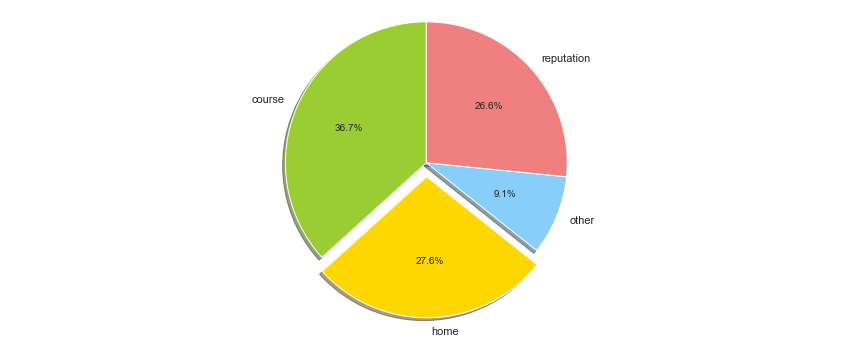

In [22]:
import matplotlib.pyplot as plt

labels = group_student_mat_reason["reason"]
sizes = group_student_mat_reason["school"]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0) 

# グラフの大きさ指定
plt.figure(figsize = (15, 6))

# グラフを表示
plt.pie(sizes, explode , labels , colors ,
        autopct = '%1.1f%%', shadow = True, startangle = 90)

# 円を丸く描画
plt.axis('equal')

#### <練習問題 5-2>

<練習問題 5-2>と同じデータで、`higher` (高い教育を受けたいかどうか。値は`yes`か`no`）を軸にして、それぞれの数学の最終成績G3の平均値を棒グラフで表示してください。ここから何か推測できることはありますか？

In [29]:
group_student_mat_higher = df_student_mat.groupby("higher").agg({"G1":"mean", "G2":"mean", "G3":"mean"})
group_student_mat_higher

G1         G2      G3
higher                              
no       8.350000   7.800000   6.800
yes     11.045333  10.869333  10.608

In [32]:
group_student_mat_higher.loc["no"]

G1    8.35
G2    7.80
G3    6.80
Name: no, dtype: float64

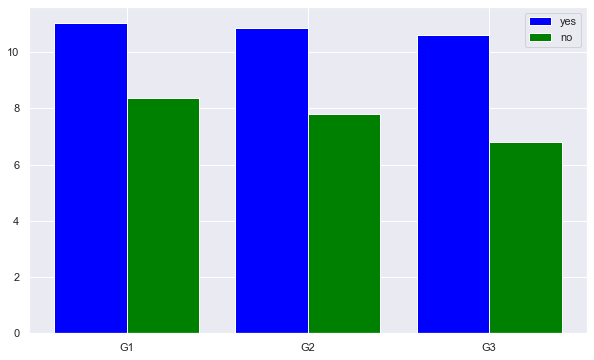

In [39]:
# データの準備
y1 = group_student_mat_higher.loc["yes"]
y2 = group_student_mat_higher.loc["no"]

# X軸のデータ
x = np.arange(len(y1))

# グラフの幅
w = 0.4

# グラフの大きさ指定
plt.figure(figsize = (10, 6))

# グラフの描画。y2の方はグラフの幅の分、右にずらして描画する 
plt.bar(x, y1, color = 'blue', width = w, label = 'yes', align = 'center')
plt.bar(x + w, y2, color='green', width = w, label = 'no', align = 'center')

# 凡例を最適な位置に配置
plt.legend(loc = 'best')

plt.xticks(x + w / 2, ['G1', 'G2', 'G3'])

plt.grid(True)

#### <練習問題 5-3>

上記と同じデータで、通学時間（`traveltime`）を軸にして、それぞれの数学の最終成績G3の平均値を横棒グラフで表示してください。何か推測できることはありますか？

In [45]:
group_student_mat_traveltime = df_student_mat.groupby("traveltime",as_index=False).agg({"G1":"mean", "G2":"mean", "G3":"mean"})
group_student_mat_traveltime

traveltime         G1         G2         G3
0           1  11.097276  11.058366  10.782101
1           2  10.644860  10.336449   9.906542
2           3  10.739130   9.565217   9.260870
3           4   8.875000   8.000000   8.750000

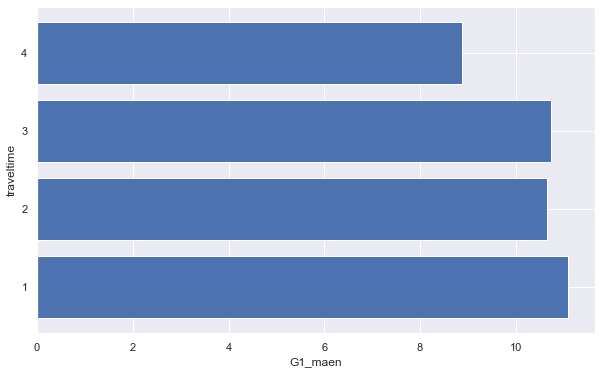

In [47]:
# 表示するデータ
x = group_student_mat_traveltime["traveltime"]
y = group_student_mat_traveltime["G1"]

# グラフの大きさ指定 
plt.figure(figsize = (10, 6))

plt.barh(x, y, align = 'center')
plt.yticks(x)
plt.ylabel('traveltime')
plt.xlabel('G1_maen')
plt.grid(True)

## 5.3 応用：金融データの可視化
キーワード：ローソクチャート

ここでは、金融データの可視化について扱っていきます。ただし、応用範囲ですので、スキップしても問題ありません。練習問題もありません。

### 5.3.1 可視化する金融データ

この節では、次に示す金融データの可視化を考えます。

In [3]:
# 日付データの設定。freq='T'で1分ごとにデータを生成する
idx = pd.date_range('2015/01/01', '2015/12/31 23:59', freq='T')

# 乱数の発生。１か−１を発生させる
dn = np.random.randint(2, size = len(idx)) * 2 - 1

# ランダムウォーク（ランダムに数値が増減するデータ）を作成
# np.cumprodは累積積を算出している（1番目の要素 * 2番目の要素 * 3番目の要素 * … と和が累積されていく）
rnd_walk = np.cumprod(np.exp(dn * 0.0002)) * 100

# resample('B')でデータを営業日単位でリサンプリング。
# ohlcメソッドで「open」「high」「low」「close」の4つのデータにする。
df = pd.Series(rnd_walk, index=idx).resample('B').ohlc()

そのままプロットすると、以下のようになります。なお、ここではPandasの可視化機能を使っています。数値はランダムに生成しているので、実際には紙面とは異なる形のグラフになります。

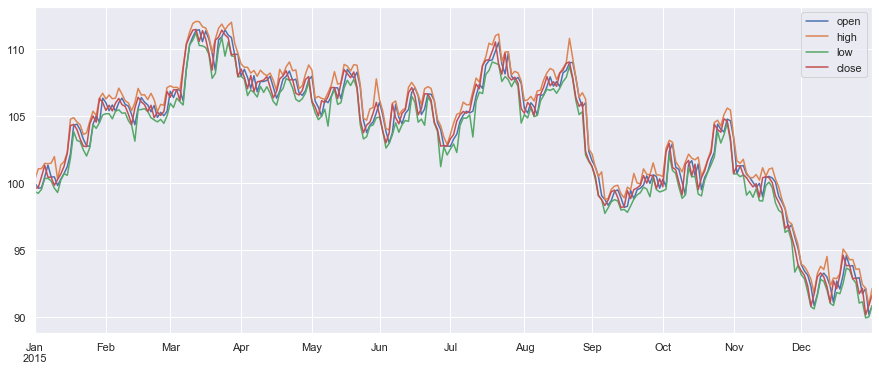

In [49]:
df.plot(figsize = (15,6), legend = 'best', grid = True)

### 5.3.2 ローソクチャートを表示するライブラリ

このグラフをローソクチャートとして表示してみましょう。
そのためには、Plotlyライブラリが必要です。Jupyter Notebookのセルに「!pip install plotly」と入力して［Run］を実行し、インストールしておいてださい。


ローソクチャートの表示に関しては、参考URL「B-23」も参考にしてください。


In [50]:
!pip install plotly 

     |████████████████████████████████| 7.3MB 2.5MB/s eta 0:00:01
  Stored in directory: /Users/kanekotakafumi/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


Plotlyライブラリのローソクチャート作成の機能を使えば、以下のように綺麗に表示することができます。インタラクティブにグラフをズームインすることもできますし、カーソルを載せると数字が表示され便利です。

In [8]:
# plotly モジュールのインポート
from plotly.offline import init_notebook_mode, plot
from plotly import figure_factory as FF

# Jupyter notebook用設定
init_notebook_mode(connected=False) 

# ローソクチャートの設定
fig = FF.create_candlestick(df.open, df.high, df.low, df.close, dates = df.index)
plot(fig)

'temp-plot.html'

参考文献「A-16」もご覧ください。PythonではなくJavaScriptのものもありますが、データを可視化するのに参考となります。『PythonユーザのためのJupyter［実践］入門』はJupyter Notebookの使い方について詳しく記載があり、データの可視化についてのコンテンツが充実しています。

## 5.4 応用：分析結果の見せ方を考えよう
ゴール：基本的な資料作成の方法を知る、データ分析結果を伝えるためのポイントを知る

これまでは、データ分析に必要なプログラミング技法を中心に、データ処理やそのテクニックについて学んできました。データの可視化についても、データを棒グラフにしたり、折れ線グラフにする方法、ラベルのつけ方など、テクニカルな解説が中心でした。自分自身の理解のために、探索的にデータをチェックするだけであれば、特に体裁は気にせず、デフォルトでグラフ表示される結果を見るだけでよいかもしれません。しかし、データ分析の結果を第三者に伝えるためには、その見せ方を工夫する必要があります。説明的分析ともいいますが、そのデータ分析結果を他人に伝える方法や、その資料作成の方法について、基本的なポイントを以下に記載します。

### 5.4.1 資料作成のポイントについて
キーワード：特になし

データの分析結果の報告は、今の会社にいる上層部への報告、クライアントへの提案など、さまざまな場面があります。資料作成の方法は、以下で紹介する参考文献などたくさんありますが、次に示す点は共通して大切です。

- 何のためにデータ分析をして、何を見せたいのかはっきりさせる

- そもそもその分析結果を誰に伝えるのか？　を考える

- いきなり資料の作成を開始しない、PowerPointを開かない、その前に考える

- その結果を見せることで、どんな具体的なアクションを促したいか？

- それをやることでどれだけ儲かるか？　コストが下がるのか？

- 何を話すのか、目次（アジェンダ）をはっきりさせる（全体像を見せる） 

- 基本的に結論が先

- 情報を入れすぎない、無駄なものは削除

- 言いたいことを一言で＋下にその根拠となるデータ（表）の可視化

- ストーリーを考える

その他、第三者に説明するときに3Dのグラフはあまり使わないほうが良いなどのポイントなどもありますが、それも場面によるので、やはりその結果を誰に見せるのか考えることが大事です。

また、先ほども書いたように、データを可視化するのは、Excelや他のツール（Tableauなど）でも良いです。この書籍ではPythonを採用しているのでMatplotlibを使ってグラフ等を表示していますが、ビジネスの現場で無理してMatplotlibを使う必要はありません。データがそれほど大きくない場合、素早くデータを可視化するのにExcelは非常に優れています。ケースバイケースで判断して、ツールを選んでください。

短いですが、以上が資料作成の基本となる作法になります。本書では、これ以上詳しくは扱いません。
以下は参考となる本で、資料を作成する際に読んでみてください。なお、本書は資料作成を主テーマとした本ではないので、テクニカルな技術を身につけるという視点でこのまま解説をしていきます。

参考文献「A-17」も参考にしてください。

以上でデータ可視化の章は終了です。お疲れ様でした。

次の問題は、金融の時系列データとマーケティングの購買データに関する総合問題です。今まで学んだテクニックが活かせる問題です。一部、これまで扱わなかった処理方法もあるので、ヒントなど参考にして、調べながら取り組んでください。
初学者にはなかなかハードな問題かもしれませんが、これらの問題に取り組むことで、今まで学んだ技法が役に立つことを実感できるでしょう。

***

## 5.5 総合問題

### ■総合問題5-1 時系列データ分析

ここでは、本章で身に付けたPandasやScipyなどを使って、時系列データついて扱っていきましょう。

（1）（データの取得と確認）下記のサイトより、dow_jones_index.zipをダウンロードし、含まれている`dow_jones_index.data`を使って、データを読み込み、はじめの5行を表示してください。またデータのそれぞれのカラム情報等を見て、`NaN`などがあるか確認してください。　　

https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip　　

（2）（データの加工）カラムの`open`、`high`、`low`、`close`等のデータは数字の前に$マークが付いているため、これを取り除いてください。また、日時を`date`型で読み込んでいない場合は、date型に変換しましょう。

（3）カラムの`close`について、各`stock`ごとの要約統計量を算出してください。

（4）カラムの`close`について、各`stock`の相関を算出する相関行列を出してください。また、`Seaborn`の`heatmap`関数を使って、相関行列のヒートマップを描いてみましょう（ヒント：`Pandas`の`corr`メソッドを使います）。

（5）(4)で算出した相関行列の中で一番相関係数が高い`stock`の組み合わせを抽出してください。さらに、その中でもっとも相関係数が高いペアを抜き出し、それぞれの時系列グラフを描いてください。

（6） Pandasの`rolling`メソッド（窓関数）を使って、上記で使った各`stock`ごとに、`close`の過去5期（5週間）移動平均時系列データを計算してください。

（7） Pandasの`shift`メソッドを使って、上記で使った各stockごとに、`close`の前期（1週前）との比の対数時系列データを計算してください。さらに、この中で、一番ボラティリティ（標準偏差）が一番大きい`stock`と小さい`stock`を抜き出し、その対数変化率グラフを書いてください。

>**[ポイント]**
>
>(6)、(7)の補足についての補足です。
>
>時系列データ$(\cdots ,y_{t-1},y_t,y_{t+1}, \cdots )$の過去n期の移動平均データとは、過去n期のデータの平均、つまり以下を意味します。

\begin{eqnarray}
ma_t = \sum_{s=t-n+1}^t \frac{y_s}{n}
\end{eqnarray}

>時系列データ$(\cdots ,y_{t-1},y_t,y_{t+1}, \cdots )$の前期（1週前）との比の対数時系列データとは、$\log \frac{y_t} {y_{t-1}}$から成るデータのことです。増減率$r_t = \frac{y_t - y_{t-1}}{y_t}$が小さいとき、$r_t \approx \log \frac{y_t} {y_{t-1}}$の関係が成り立ちます。これは、$x$が十分小さいときに成り立つ、$\log (1+x) \approx x$から導かれます。増減率データ$(r_1,\cdots ,r_N )$のボラティリティとは、標準偏差

\begin{eqnarray}
\sqrt{\frac{1}{N}\sum_{t=1}^N \left(r_t - \frac{1}{N}\sum_{t=1}^N r_t\right)^2}
\end{eqnarray}

>のことで、価格変動の大きさを示す指標として利用されます。

（1）（データの取得と確認）下記のサイトより、dow_jones_index.zipをダウンロードし、含まれているdow_jones_index.dataを使って、データを読み込み、はじめの5行を表示してください。またデータのそれぞれのカラム情報等を見て、NaNなどがあるか確認してください。

In [93]:
import os
import zipfile
import requests
import io

#現在の最大表示列数の出力
pd.get_option("display.max_columns")

#最大表示列数の指定（ここでは50列を指定）
pd.set_option('display.max_columns', 50)

In [26]:
# データがあるurlの指定
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip'

# データをurlから取得
r = requests.get(url, stream=True)

# zipfile内のdow_jones_index.dataをカレントディレクトリ内のdataディレクトリに展開
with zipfile.ZipFile(io.BytesIO(r.content)) as existing_zip:
    existing_zip.extract('dow_jones_index.data','data')
    
with zipfile.ZipFile(io.BytesIO(r.content)) as existing_zip:
    existing_zip.extract('dow_jones_index.names','data')

In [15]:
# csvfileが存在するディレクトリ
data_dir = './data'

# data_dir内のファイルを確認
os.listdir(data_dir)

['dow_jones_index.data', '.ipynb_checkpoints']

In [20]:
# student-mat.csvのpathを取得
path = os.path.join(data_dir, 'dow_jones_index.csv')
path

'./data/dow_jones_index.csv'

In [36]:
df = pd.read_csv(path,sep=",")

In [103]:
print(df.head(5))

   quarter stock       date   open   high    low  close     volume  \
0        1    AA   1/7/2011  15.82  16.72  15.78  16.42  239655616   
1        1    AA  1/14/2011  16.71  16.71  15.64  15.97  242963398   
2        1    AA  1/21/2011  16.19  16.38  15.60  15.79  138428495   
3        1    AA  1/28/2011  15.87  16.63  15.82  16.13  151379173   
4        1    AA   2/4/2011  16.18  17.39  16.18  17.14  154387761   

   percent_change_price  percent_change_volume_over_last_wk  \
0               3.79267                                 NaN   
1              -4.42849                            1.380223   
2              -2.47066                          -43.024959   
3               1.63831                            9.355500   
4               5.93325                            1.987452   

   previous_weeks_volume next_weeks_open next_weeks_close  \
0                    NaN          $16.71           $15.97   
1            239655616.0          $16.19           $15.79   
2            2429

In [38]:
print('データ数は{}、変数は{}種類です。'.format(df.shape[0], df.shape[1]))

データ数は750、変数は16種類です。


In [39]:
df.columns

Index(['quarter', 'stock', 'date', 'open', 'high', 'low', 'close', 'volume',
       'percent_change_price', 'percent_change_volume_over_last_wk',
       'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close',
       'percent_change_next_weeks_price', 'days_to_next_dividend',
       'percent_return_next_dividend'],
      dtype='object')

In [40]:
df.isnull().sum() 

quarter                                0
stock                                  0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64

In [63]:
df.dtypes

quarter                                 int64
stock                                  object
date                                   object
open                                   object
high                                   object
low                                    object
close                                  object
volume                                  int64
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
previous_weeks_volume                 float64
next_weeks_open                        object
next_weeks_close                       object
percent_change_next_weeks_price       float64
days_to_next_dividend                   int64
percent_return_next_dividend          float64
dtype: object

（2）（データの加工）カラムのopen、high、low、close等のデータは数字の前に$マークが付いているため、これを取り除いてください。また、日時をdate型で読み込んでいない場合は、date型に変換しましょう。

In [90]:
replace = lambda x: str(x).replace('$','')

df["open"]=df["open"].apply(replace).astype("float64")
df["high"]=df["high"].apply(replace).astype("float64")
df["low"]=df["low"].apply(replace).astype("float64")
df["close"]=df["close"].apply(replace).astype("float64")

In [107]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

In [110]:
df.head(5)

quarter stock       date   open   high    low  close     volume  \
0        1    AA 2011-01-07  15.82  16.72  15.78  16.42  239655616   
1        1    AA 2011-01-14  16.71  16.71  15.64  15.97  242963398   
2        1    AA 2011-01-21  16.19  16.38  15.60  15.79  138428495   
3        1    AA 2011-01-28  15.87  16.63  15.82  16.13  151379173   
4        1    AA 2011-02-04  16.18  17.39  16.18  17.14  154387761   

   percent_change_price  percent_change_volume_over_last_wk  \
0               3.79267                                 NaN   
1              -4.42849                            1.380223   
2              -2.47066                          -43.024959   
3               1.63831                            9.355500   
4               5.93325                            1.987452   

   previous_weeks_volume next_weeks_open next_weeks_close  \
0                    NaN          $16.71           $15.97   
1            239655616.0          $16.19           $15.79   
2            242963398.0          $15.87           $16.13   
3            138428495.0          $16.18           $17.14   
4            151379173.0          $17.33           $17.37   

   percent_change_next_weeks_price  days_to_next_dividend  \
0                        -4.428490                     26   
1                        -2.470660                     19   
2                         1.638310                     12   
3                         5.933250                      5   
4                         0.230814                     97   

   percent_return_next_dividend  
0                      0.182704  
1                      0.187852  
2                      0.189994  
3                      0.185989  
4                      0.175029

（3）カラムのcloseについて、各stockごとの要約統計量を算出してください。

In [113]:
group_stock_close = df.groupby("stock")['close'].describe()
group_stock_close

count      mean       std     min     25%     50%     75%     max
stock                                                                   
AA      25.0   16.5044  0.772922   14.72   16.03   16.52   17.10   17.92
AXP     25.0   46.7124  2.396248   43.53   44.36   46.25   48.50   51.19
BA      25.0   73.4480  3.087631   69.10   71.64   72.69   74.84   79.78
BAC     25.0   13.0516  1.417382   10.52   11.93   13.37   14.25   15.25
CAT     25.0  103.1520  6.218651   92.75   99.59  103.54  107.21  115.41
CSCO    25.0   17.8992  1.984095   14.93   16.88   17.52   18.70   22.05
CVX     25.0  101.1756  5.267066   91.19   97.90  102.10  103.75  109.66
DD      25.0   52.8736  2.367048   48.35   50.29   52.91   54.63   56.79
DIS     25.0   41.2496  1.882473   37.58   39.45   41.52   42.95   43.56
GE      25.0   19.7840  0.912022   17.97   19.25   19.95   20.36   21.44
HD      25.0   36.5600  1.270213   33.47   36.00   37.01   37.42   38.48
HPQ     25.0   41.5364  4.263754   34.90   40.26   40.99   45.09   48.67
IBM     25.0  163.1016  5.730211  147.93  162.18  164.05  166.21  170.58
INTC    25.0   21.4352  1.072272   19.72   20.82   21.46   21.86   23.41
JNJ     25.0   62.6236  2.846177   58.57   60.01   62.55   65.69   66.77
JPM     25.0   44.4996  2.095094   39.49   43.15   44.91   45.74   48.00
KO      25.0   65.3264  1.970774   62.21   63.57   65.22   67.22   68.30
KRFT    25.0   32.5576  1.570584   30.53   31.26   31.70   34.08   35.23
MCD     25.0   77.2704  3.004153   72.99   75.01   76.14   80.36   82.52
MMM     25.0   91.6980  2.692709   86.23   90.25   91.80   93.22   97.21
MRK     25.0   34.3604  1.666357   31.91   33.06   34.04   35.82   37.35
MSFT    25.0   25.9208  1.416407   23.70   24.80   25.68   27.06   28.60
PFE     25.0   19.8216  0.915085   18.15   19.19   20.11   20.53   20.97
PG      25.0   64.0020  1.828795   60.60   62.59   64.30   65.27   67.36
T       25.0   29.6268  1.369257   27.49   28.43   30.34   30.71   31.41
TRV     25.0   59.1600  2.649218   53.33   57.92   59.21   61.18   63.43
UTX     25.0   84.0332  2.985547   79.08   82.52   83.52   85.32   89.58
VZ      25.0   36.4696  0.932820   34.95   35.84   36.31   37.26   38.47
WMT     25.0   53.9128  1.555639   51.52   52.54   53.66   55.29   56.70
XOM     25.0   82.1116  3.137743   75.59   79.78   82.63   84.50   87.98

（4）カラムのcloseについて、各stockの相関を算出する相関行列を出してください。また、Seabornのheatmap関数を使って、相関行列のヒートマップを描いてみましょう（ヒント：Pandasのcorrメソッドを使います）。

In [137]:
dfc = df.pivot(columns='stock', index = 'date', values='close').astype(float)
dfc

stock          AA    AXP     BA    BAC     CAT   CSCO     CVX     DD    DIS  \
date                                                                          
2011-01-07  16.42  44.36  69.38  14.25   93.73  20.97   91.19  49.76  39.45   
2011-01-14  15.97  46.25  70.07  15.25   94.01  21.21   92.83  49.80  39.29   
2011-01-21  15.79  46.00  71.68  14.25   92.75  20.72   93.78  48.35  39.74   
2011-01-28  16.13  43.86  69.23  13.60   95.68  20.93   93.37  50.29  38.85   
2011-02-04  17.14  43.82  71.38  14.29   99.59  22.05   97.11  52.53  40.71   
2011-02-11  17.37  46.75  72.14  14.77  103.54  18.70   96.45  54.58  43.41   
2011-02-18  17.28  45.53  73.04  14.75  105.86  18.85   98.72  55.98  43.56   
2011-02-25  16.68  43.53  72.30  14.20  102.00  18.64  102.10  54.07  42.95   
2011-03-04  16.58  43.72  71.80  14.12  103.04  18.40  103.75  53.87  43.55   
2011-03-11  16.03  44.28  71.64  14.38  100.02  17.95   99.93  52.90  42.93   
2011-03-18  16.11  44.17  69.10  14.04  105.06  17.14  102.80  52.99  41.23   
2011-03-25  17.09  45.59  73.34  13.34  109.09  17.28  106.78  54.10  42.97   
2011-04-01  17.47  45.36  74.01  13.37  113.12  17.04  108.32  55.19  42.85   
2011-04-08  17.92  46.28  73.47  13.48  109.82  17.65  109.66  55.40  41.76   
2011-04-15  16.52  46.25  72.60  12.82  107.21  17.03  106.24  54.89  41.52   
2011-04-21  16.97  47.11  75.44  12.31  109.42  16.94  108.13  55.91  42.27   
2011-04-29  17.00  49.08  79.78  12.28  115.41  17.52  109.44  56.79  43.10   
2011-05-06  17.15  50.20  79.31  12.31  110.34  17.56  102.88  54.63  43.06   
2011-05-13  17.10  49.49  79.03  11.93  106.33  16.88  102.39  52.91  41.52   
2011-05-20  16.26  51.19  77.52  11.58  104.33  16.53  102.57  52.74  41.50   
2011-05-27  16.48  51.13  76.99  11.69  104.60  16.46  103.21  52.56  41.52   
2011-06-03  15.92  49.28  74.84  11.28  101.10  16.01  101.00  50.29  39.38   
2011-06-10  15.28  47.74  72.69  10.80   96.79  15.12   99.67  49.78  38.50   
2011-06-17  14.72  48.50  74.16  10.68   95.95  14.97   99.17  49.57  38.04   
2011-06-24  15.23  48.34  71.26  10.52  100.01  14.93   97.90  51.96  37.58   

stock          GE     HD    HPQ     IBM   INTC    JNJ    JPM     KO   KRFT  \
date                                                                         
2011-01-07  18.43  34.38  45.09  147.93  20.66  62.60  43.64  62.92  31.19   
2011-01-14  18.82  35.89  46.25  150.00  21.08  62.55  44.91  63.13  31.34   
2011-01-21  19.74  36.51  47.23  155.50  20.82  62.66  45.29  62.77  31.35   
2011-01-28  20.20  36.70  45.51  159.21  21.46  60.01  44.54  62.21  30.53   
2011-02-04  20.56  36.80  47.43  164.00  21.68  60.84  44.59  62.56  31.19   
2011-02-11  21.33  37.48  48.64  163.85  21.76  60.70  46.57  63.57  30.66   
2011-02-18  21.44  38.48  48.67  164.84  22.14  61.11  48.00  64.55  30.91   
2011-02-25  20.82  37.08  42.68  162.28  21.86  59.64  46.68  64.31  31.71   
2011-03-04  20.37  37.22  42.61  161.83  21.56  61.06  45.52  65.21  31.58   
2011-03-11  20.36  37.14  41.73  162.43  20.87  59.69  45.74  64.81  31.70   
2011-03-18  19.25  36.00  41.32  155.89  19.93  58.57  45.74  62.70  30.99   
2011-03-25  19.75  37.42  42.53  162.18  20.37  58.98  45.86  65.22  31.26   
2011-04-01  20.34  37.56  40.98  164.27  19.72  59.49  46.35  67.22  31.61   
2011-04-08  20.19  37.46  40.70  164.05  20.02  59.46  46.84  67.27  31.67   
2011-04-15  20.04  38.17  40.26  166.21  19.75  60.56  44.89  68.01  33.36   
2011-04-21  19.95  37.80  40.99  168.28  21.46  64.07  44.68  67.88  33.38   
2011-04-29  20.45  37.15  40.37  170.58  23.15  65.72  45.63  67.46  33.59   
2011-05-06  20.01  36.99  40.81  168.89  23.25  65.27  45.04  66.90  34.08   
2011-05-13  19.89  37.01  40.41  169.92  23.41  66.62  43.15  68.18  34.89   
2011-05-20  19.62  37.05  35.98  170.16  23.22  65.69  43.13  68.30  35.23   
2011-05-27  19.44  36.00  36.96  167.50  22.21  66.77  42.79  66.51  34.75   
2011-06-03  18.82  34.63  36.11  165.05  21.73  66.09  41.57  65.53  34.

In [ ]:
dfc_corr = dfc.corr()

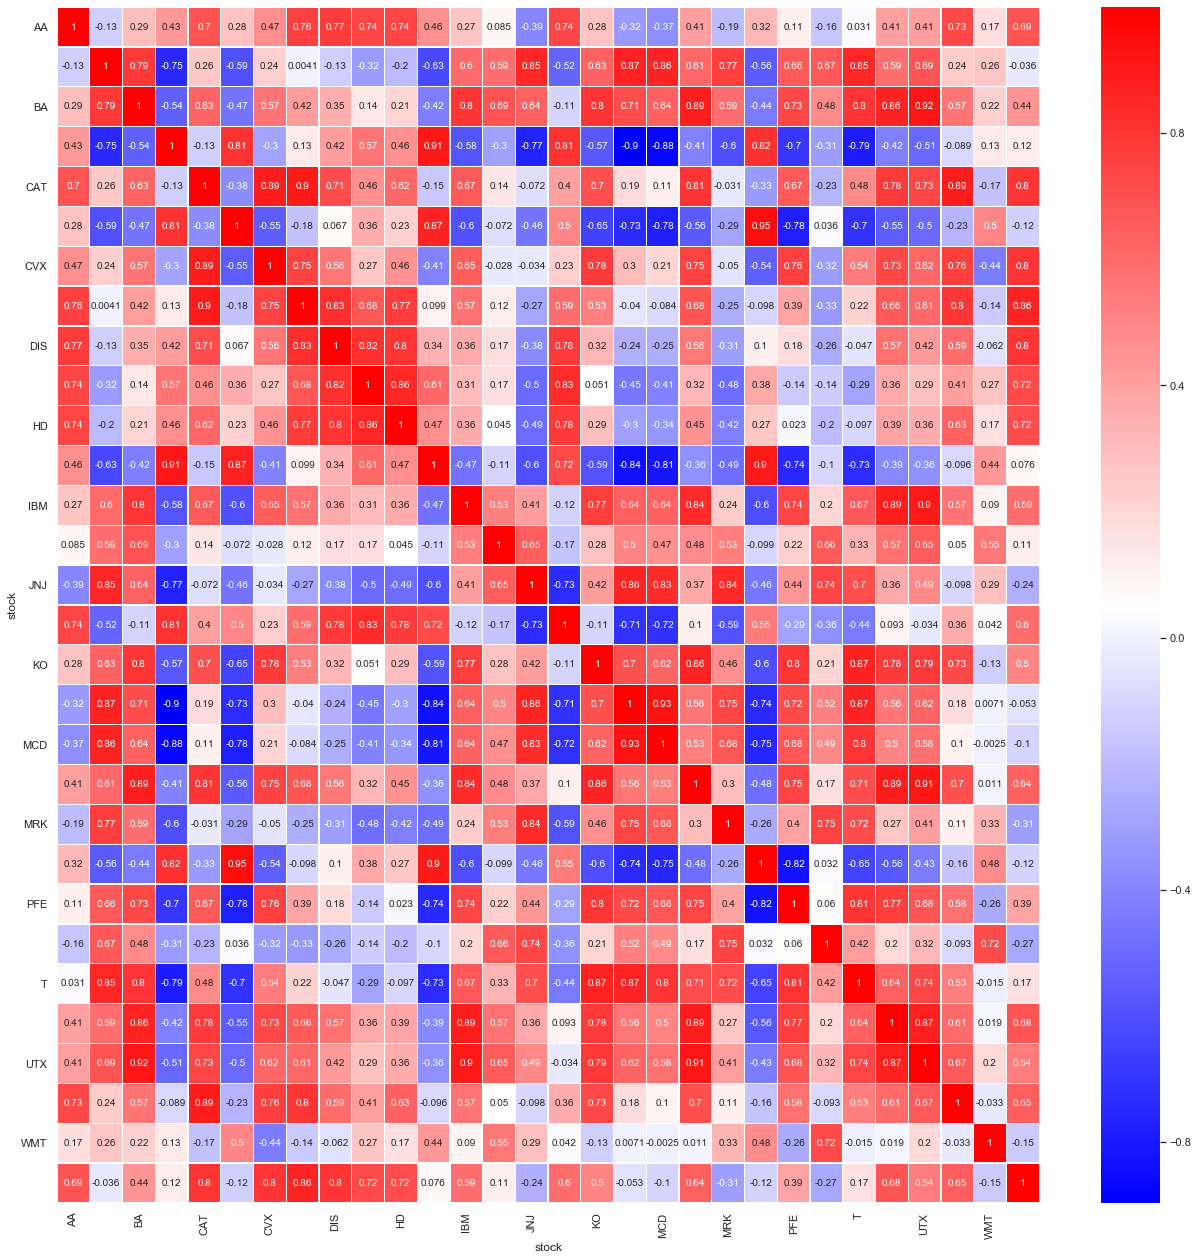

In [151]:
sns.heatmap(dfc_corr,annot=True,cmap='bwr',linewidths=0.3) 
fig=plt.gcf()
fig.set_size_inches(22,22)
plt.show()

（5）(4)で算出した相関行列の中で一番相関係数が高いstockの組み合わせを抽出してください。さらに、その中でもっとも相関係数が高いペアを抜き出し、それぞれの時系列グラフを描いてください。

In [155]:
dfc_corr = dfc.corr()

df_corrmod = dfc_corr - np.identity(30)

dfc_corr_s = df_corrmod.stack()

dfc_max_pair = dfc_corr_s.sort_values(ascending=False).head(1).index[0] 
dfc_max_pair

('CSCO', 'MSFT')

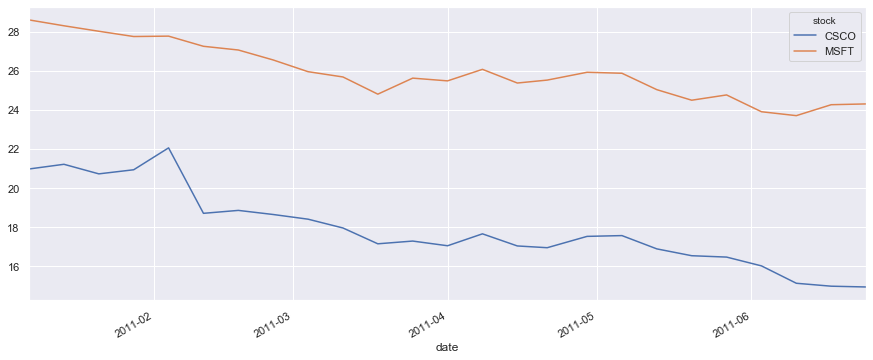

In [149]:
dfc[list(dfc_max_pair)].plot(figsize = (15,6), legend = 'best', grid = True)

（6） Pandasのrollingメソッド（窓関数）を使って、上記で使った各stockごとに、closeの過去5期（5週間）移動平均時系列データを計算してください。

In [162]:
dfc_rplling = dfc.rolling(5).mean().dropna()
dfc_rplling.head(5)

stock           AA     AXP      BA     BAC      CAT    CSCO     CVX      DD  \
date                                                                          
2011-02-04  16.290  44.858  70.348  14.328   95.152  21.176  93.656  50.146   
2011-02-11  16.480  45.336  70.900  14.432   97.114  20.722  94.708  51.110   
2011-02-18  16.742  45.192  71.494  14.332   99.484  20.250  95.886  52.346   
2011-02-25  16.920  44.698  71.618  14.322  101.334  19.834  97.550  53.490   
2011-03-04  17.010  44.670  72.132  14.426  102.806  19.328  99.626  54.206   

stock          DIS      GE      HD     HPQ      IBM    INTC     JNJ     JPM  \
date                                                                          
2011-02-04  39.608  19.550  36.056  46.302  155.328  21.140  61.732  44.594   
2011-02-11  40.400  20.130  36.676  47.012  158.512  21.360  61.352  45.180   
2011-02-18  41.254  20.654  37.194  47.496  161.480  21.572  61.064  45.798   
2011-02-25  41.896  20.870  37.308  46.586  162.836  21.780  60.460  46.076   
2011-03-04  42.836  20.904  37.412  46.006  163.360  21.800  60.670  46.272   

stock           KO    KRFT     MCD     MMM     MRK    MSFT     PFE      PG  \
date                                                                         
2011-02-04  62.718  31.120  74.154  87.870  34.288  28.088  18.498  64.750   
2011-02-11  62.848  31.014  74.508  88.984  33.432  27.818  18.596  64.796   
2011-02-18  63.132  30.928  74.922  89.956  33.156  27.570  18.766  64.550   
2011-02-25  63.440  31.000  74.808  90.148  32.814  27.276  18.866  63.936   
2011-03-04  64.040  31.210  75.358  91.098  32.812  26.916  19.168  63.502   

stock            T     TRV     UTX      VZ     WMT     XOM  
date                                                        
2011-02-04  28.214  55.236  80.462  35.656  55.470  78.936  
2011-02-11  28.138  56.368  81.686  35.748  55.792  80.382  
2011-02-18  28.166  57.626  82.872  35.980  55.906  81.714  
2011-02-25  28.126  58.546  83.506  36.184  55.110  82.986  
2011-03-04  28.212  59.220  83.792  36.274  54.184  84.204

（7） Pandasのshiftメソッドを使って、上記で使った各stockごとに、closeの前期（1週前）との比の対数時系列データを計算してください。さらに、この中で、一番ボラティリティ（標準偏差）が一番大きいstockと小さいstockを抜き出し、その対数変化率グラフを書いてください。

In [169]:
dfc_shift = np.log(dfc_rplling/dfc_rplling.shift(-1)).dropna()
dfc_shift.head()

stock             AA       AXP        BA       BAC       CAT      CSCO  \
date                                                                     
2011-02-04 -0.011596 -0.010599 -0.007816 -0.007232 -0.020410  0.021673   
2011-02-11 -0.015773  0.003181 -0.008343  0.006953 -0.024111  0.023041   
2011-02-18 -0.010576  0.010991 -0.001733  0.000698 -0.018425  0.020757   
2011-02-25 -0.005305  0.000627 -0.007151 -0.007235 -0.014422  0.025843   
2011-03-04  0.013137 -0.002057 -0.000721 -0.001247 -0.000836  0.043352   

stock            CVX        DD       DIS        GE        HD       HPQ  \
date                                                                     
2011-02-04 -0.011170 -0.019041 -0.019799 -0.029236 -0.017049 -0.015218   
2011-02-11 -0.012362 -0.023895 -0.020918 -0.025698 -0.014025 -0.010243   
2011-02-18 -0.017205 -0.021619 -0.015442 -0.010404 -0.003060  0.019345   
2011-02-25 -0.021058 -0.013297 -0.022189 -0.001628 -0.002784  0.012528   
2011-03-04 -0.005645 -0.001364 -0.010312  0.001915 -0.001816  0.025092   

stock            IBM      INTC       JNJ       JPM        KO      KRFT  \
date                                                                     
2011-02-04 -0.020291 -0.010353  0.006175 -0.013055 -0.002071  0.003412   
2011-02-11 -0.018551 -0.009876  0.004705 -0.013586 -0.004509  0.002777   
2011-02-18 -0.008362 -0.009596  0.009941 -0.006052 -0.004867 -0.002325   
2011-02-25 -0.003213 -0.000918 -0.003467 -0.004245 -0.009413 -0.006751   
2011-03-04  0.001924  0.007459  0.003798 -0.004958 -0.007002 -0.003263   

stock            MCD       MMM       MRK      MSFT       PFE        PG  \
date                                                                     
2011-02-04 -0.004762 -0.012598  0.025282  0.009659 -0.005284 -0.000710   
2011-02-11 -0.005541 -0.010864  0.008290  0.008955 -0.009100  0.003804   
2011-02-18  0.001523 -0.002132  0.010368  0.010721 -0.005315  0.009558   
2011-02-25 -0.007325 -0.010483  0.000061  0.013286 -0.015881  0.006811   
2011-03-04 -0.007088 -0.007262  0.000976  0.015652 -0.001772  0.006699   

stock              T       TRV       UTX        VZ       WMT       XOM  
date                                                                    
2011-02-04  0.002697 -0.020287 -0.015098 -0.002577 -0.005788 -0.018153  
2011-02-11 -0.000995 -0.022072 -0.014415 -0.006469 -0.002041 -0.016435  
2011-02-18  0.001421 -0.015839 -0.007621 -0.005654  0.014341 -0.015447  
2011-02-25 -0.003053 -0.011447 -0.003419 -0.002484  0.016946 -0.014571  
2011-03-04 -0.003468 -0.004952  0.002964  0.002539  0.012779  0.002759

In [177]:
dfc_shift_std = dfc_shift.std()
dfc_shift_std

stock
AA      0.012969
AXP     0.010685
BA      0.010927
BAC     0.010466
CAT     0.015439
CSCO    0.011688
CVX     0.011748
DD      0.013347
DIS     0.013437
GE      0.013553
HD      0.009485
HPQ     0.013538
IBM     0.008590
INTC    0.019046
JNJ     0.010496
JPM     0.009855
KO      0.006653
KRFT    0.007079
MCD     0.005392
MMM     0.007815
MRK     0.012421
MSFT    0.007072
PFE     0.006999
PG      0.009144
T       0.008296
TRV     0.011515
UTX     0.010193
VZ      0.007251
WMT     0.009748
XOM     0.010658
dtype: float64

In [178]:
dfc_shift_std.min()

0.005392386447211048

In [187]:
dfc_shift_index = list([dfc_shift_std.idxmax(),dfc_shift_std.idxmin()])

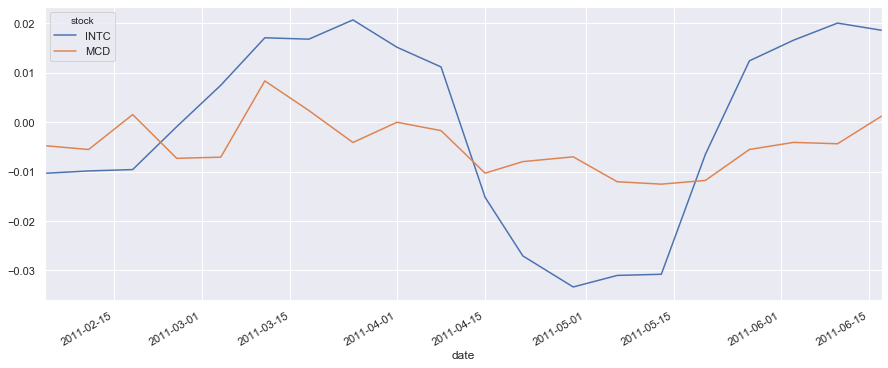

In [188]:
dfc_shift[dfc_shift_index].plot(figsize = (15,6), legend = 'best', grid = True)

### ■総合問題5-2 マーケティング分析

次は、マーケティング分析でよく扱われる購買データです。一般ユーザーとは異なる法人の購買データですが、分析する軸は基本的に同じです。

（1）下記のURLよりデータをpandasで読み込んでください（件数50万以上のデータで比較的大きいため、少し時間がかかります）。

http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx

>**[ヒント]**
>
>`pd.ExcelFile`を使って、シートを`.parse('Online Retail')`で指定してください。

また、今回の分析対象は、`CustomerID`にデータが入っているレコードのみ対象にするため、そのための処理をしてください。さらに、カラムの`InvoiceNo`には数字の前に`C`があるものはキャンセルのため、このデータを取り除いてください。他にもデータとして取り除く必要があれば、適宜処理してください。以下、このデータをベースに分析していきます。

（2）このデータのカラムには、購買日時や商品名、数量、回数、購買者の`ID`などがあります。ここで、購買者（`CustomerID`）のユニーク数、バスケット数（`InvoiceNo`のユニーク数）、商品の種類（`StockCode`ベースと`Description`ベースのユニーク数）を求めてください。

（3）このデータのカラムには、`Country`があります。このカラムを軸に、それぞれの国の購買合計金額（単位あたりの金額×数量の合計）を求め、降順にならべて、上位5つの国の結果を表示してください。

（4）（3）の上位5つの国について、それぞれの国の商品売り上げ（合計金額）の月別の時系列推移をグラフにしてください。ここで、グラフは分けて表示してください。

（5）（3）の上位5つの国について、それぞれの国における売り上げトップ5の商品を抽出してください。また、それらを国ごとに円グラフにしてください。なお、商品は「`Description`」ベースで集計してください。

In [189]:
df = pd.ExcelFile("http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx").parse('Online Retail')

In [190]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [191]:
print('データ数は{}、変数は{}種類です。'.format(df.shape[0], df.shape[1]))

データ数は541909、変数は8種類です。


In [193]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [225]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [198]:
df = df.dropna(subset=['CustomerID'])
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [233]:
df=df[df["InvoiceNo"].str.startswith('\d', na=True)]

In [217]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

（2）このデータのカラムには、購買日時や商品名、数量、回数、購買者のIDなどがあります。ここで、購買者（CustomerID）のユニーク数、バスケット数（InvoiceNoのユニーク数）、商品の種類（StockCodeベースとDescriptionベースのユニーク数）を求めてください。

In [247]:
print("購買者（CustomerID）のユニーク数{}".format(df["CustomerID"].nunique()))
print("バスケット数{}".format(df["InvoiceNo"].nunique()))
print("商品の種類{}".format(df.duplicated(subset=["StockCode","Description"]).value_counts()[True]))

購買者（CustomerID）のユニーク数4339
バスケット数18536
商品の種類394027


In [243]:
df[["StockCode","Description"]].nunique()

StockCode      3665
Description    3877
dtype: int64

（3）このデータのカラムには、Countryがあります。このカラムを軸に、それぞれの国の購買合計金額（単位あたりの金額×数量の合計）を求め、降順にならべて、上位5つの国の結果を表示してください。

In [249]:
df["Sales"]=df["Quantity"]*df["UnitPrice"]

In [257]:
gruop_Contry_sales = df.groupby("Country",as_index=False)["Sales"].max().sort_values("Sales",ascending=False)

In [266]:
top_five = list(gruop_Contry_sales["Country"].iloc[:5])
top_five

['United Kingdom', 'Netherlands', 'France', 'Singapore', 'Japan']

（4）（3）の上位5つの国について、それぞれの国の商品売り上げ（合計金額）の月別の時系列推移をグラフにしてください。ここで、グラフは分けて表示してください。

In [272]:
df["month"] = df["InvoiceDate"].dt.strftime('%Y年%m月')

In [285]:
group_country_month = df.groupby(["Country","month"],as_index=False)["Sales"].sum()

In [303]:
group_five_country_month = group_country_month[group_country_month["Country"].isin(top_five)].set_index("month")

In [323]:
group_five_country_month.sort_index(inplace=True)

In [324]:
group_France_sales = group_five_country_month[group_five_country_month["Country"].isin(["France"])]
group_France_sales

Country     Sales
month                     
2010年12月  France   9616.31
2011年01月  France  17740.12
2011年02月  France   8515.96
2011年03月  France  14589.55
2011年04月  France   5529.61
2011年05月  France  17614.88
2011年06月  France  16078.97
2011年07月  France  10000.19
2011年08月  France  13810.96
2011年09月  France  23428.04
2011年10月  France  33485.45
2011年11月  France  31337.09
2011年12月  France   7276.92

In [325]:
group_UK_sales = group_five_country_month[group_five_country_month["Country"].isin(["United Kingdom"])]
group_UK_sales

Country       Sales
month                               
2010年12月  United Kingdom  498661.850
2011年01月  United Kingdom  442190.060
2011年02月  United Kingdom  355655.630
2011年03月  United Kingdom  467198.590
2011年04月  United Kingdom  409559.141
2011年05月  United Kingdom  551568.820
2011年06月  United Kingdom  524915.480
2011年07月  United Kingdom  485612.251
2011年08月  United Kingdom  498453.320
2011年09月  United Kingdom  796780.272
2011年10月  United Kingdom  824766.220
2011年11月  United Kingdom  980645.750
2011年12月  United Kingdom  472384.170

In [326]:
group_Nl_sales = group_five_country_month[group_five_country_month["Country"].isin(["Netherlands"])]
group_Nl_sales

Country     Sales
month                          
2010年12月  Netherlands   8784.48
2011年01月  Netherlands  26611.16
2011年02月  Netherlands  23011.91
2011年03月  Netherlands  22416.49
2011年04月  Netherlands   2976.56
2011年05月  Netherlands  29185.88
2011年06月  Netherlands  26858.09
2011年07月  Netherlands     26.02
2011年08月  Netherlands  40327.81
2011年09月  Netherlands  26937.26
2011年10月  Netherlands  40708.65
2011年11月  Netherlands  25874.01
2011年12月  Netherlands  11728.02

In [327]:
group_Singapore_sales = group_five_country_month[group_five_country_month["Country"].isin(["Singapore"])]
group_Singapore_sales

Country    Sales
month                       
2011年01月  Singapore  2053.07
2011年04月  Singapore  8209.58
2011年07月  Singapore  3949.32
2011年10月  Singapore  7067.32

In [328]:
group_Japan_sales = group_five_country_month[group_five_country_month["Country"].isin(["Japan"])]
group_Japan_sales

Country    Sales
month                    
2010年12月   Japan  7705.07
2011年02月   Japan  5780.81
2011年03月   Japan    48.90
2011年04月   Japan  6548.50
2011年05月   Japan  1351.45
2011年06月   Japan  1607.04
2011年07月   Japan  3854.40
2011年09月   Japan   112.08
2011年10月   Japan  1948.04
2011年11月   Japan  8460.08

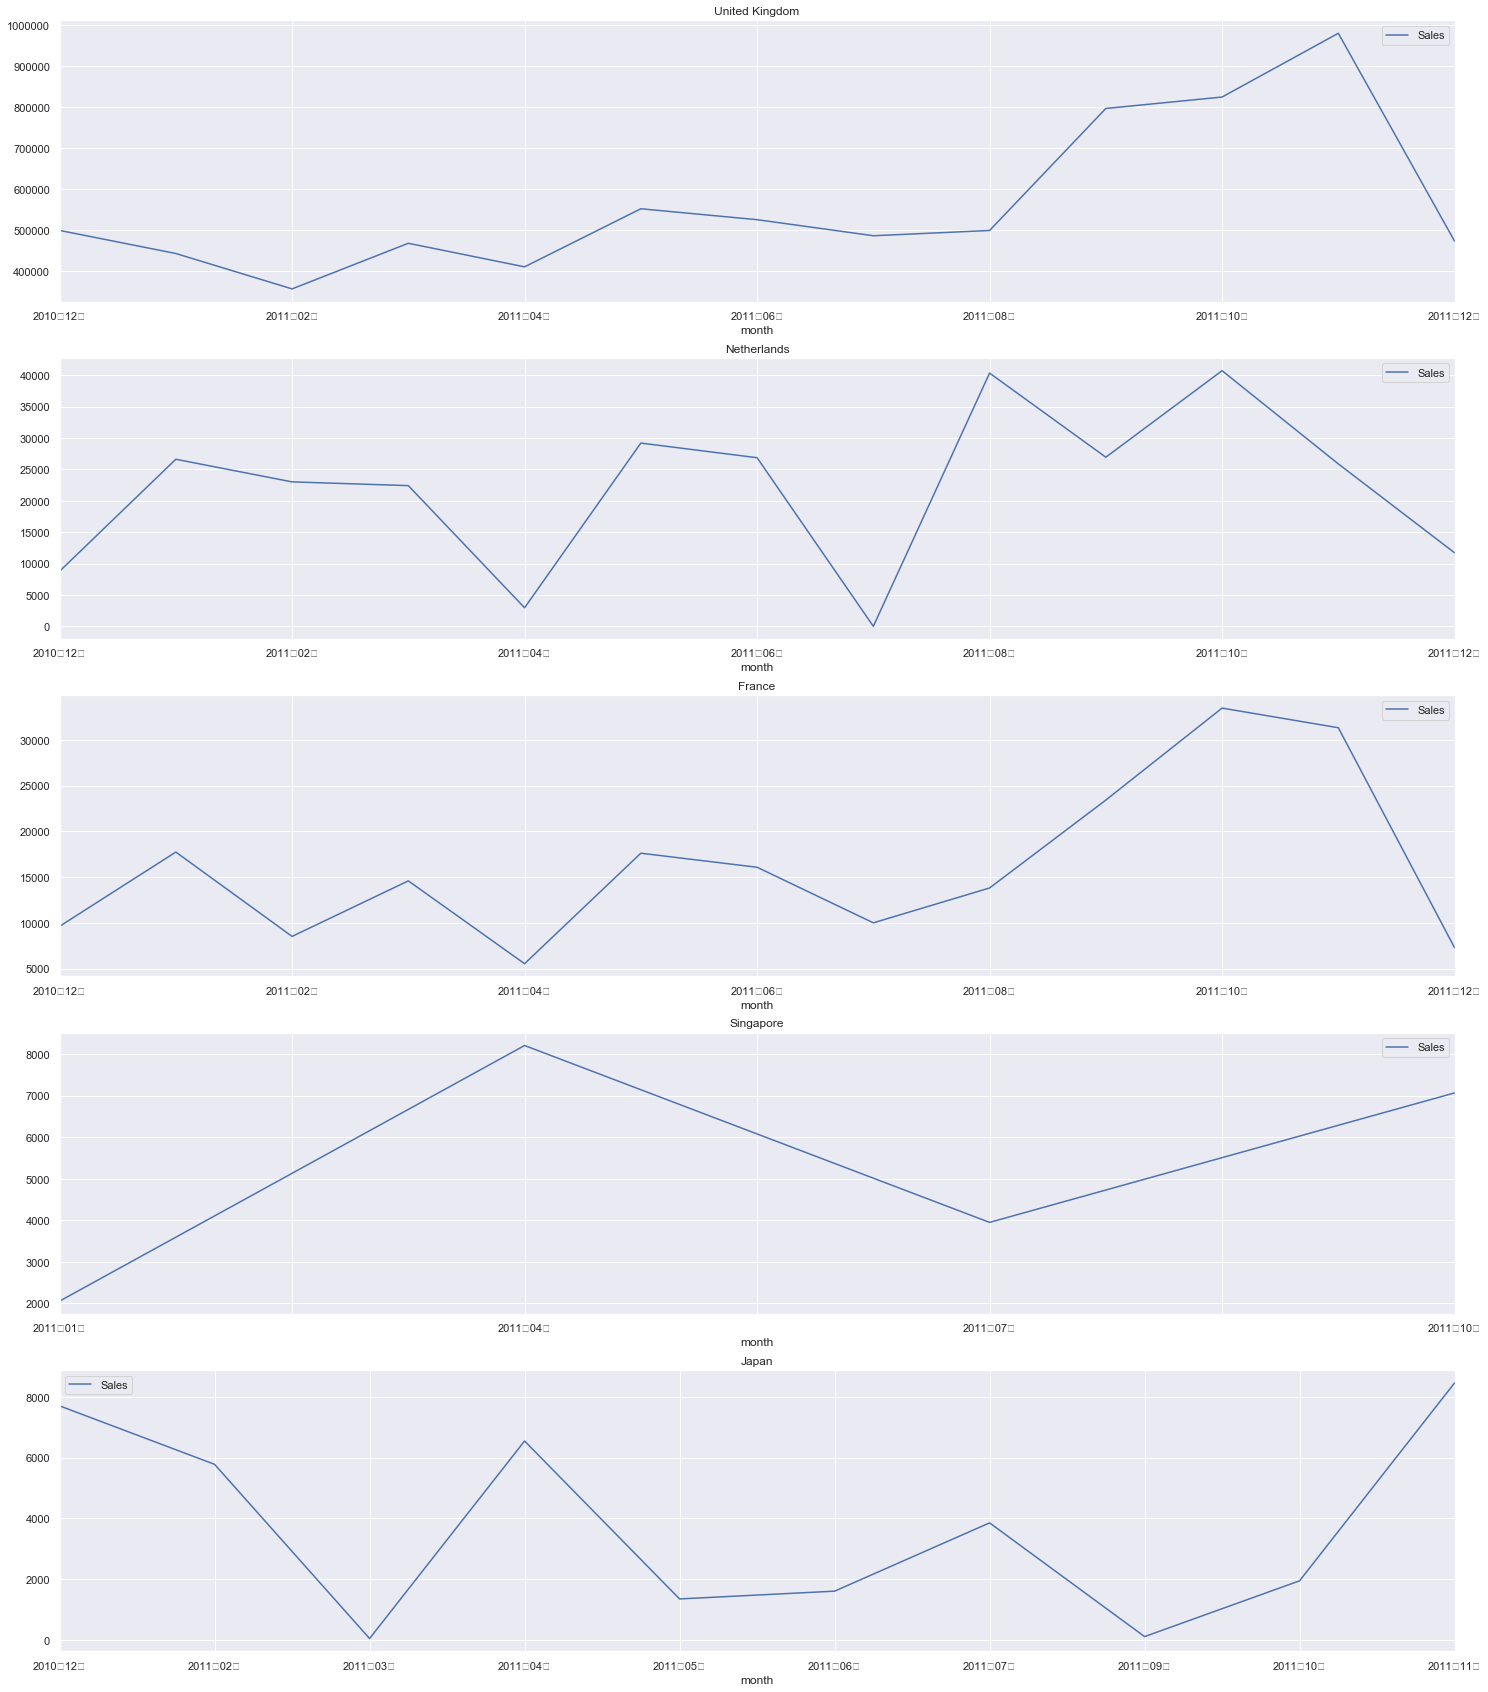

In [404]:
fig, ax = plt.subplots(5, 1, figsize=(25, 30))
ax[0].set_title(top_five[0])
group_UK_sales.plot(ax=ax[0])

ax[1].set_title(top_five[1])
group_Nl_sales.plot(ax=ax[1])

ax[2].set_title(top_five[2])
group_France_sales.plot(ax=ax[2])

ax[3].set_title(top_five[3])
group_Singapore_sales.plot(ax=ax[3])

ax[4].set_title(top_five[4])
group_Japan_sales.plot(ax=ax[4])

（5）（3）の上位5つの国について、それぞれの国における売り上げトップ5の商品を抽出してください。また、それらを国ごとに円グラフにしてください。なお、商品は「Description」ベースで集計してください。

In [368]:
group_description_sales = df.groupby(["Country","Description"],as_index=False)["Sales"].sum()
group_description_sales.sort_values("Sales", ascending=False,inplace=True)
group_description_sales.head()

Country                         Description      Sales
17565  United Kingdom         PAPER CRAFT , LITTLE BIRDIE  168469.60
18007  United Kingdom            REGENCY CAKESTAND 3 TIER  110990.20
18933  United Kingdom  WHITE HANGING HEART T-LIGHT HOLDER   94858.60
17242  United Kingdom      MEDIUM CERAMIC TOP STORAGE JAR   80291.44
17014  United Kingdom             JUMBO BAG RED RETROSPOT   77371.57

In [389]:
UK_description_sales = group_description_sales[group_description_sales["Country"].isin(["United Kingdom"])].iloc[:5].set_index("Description")
UK_description_sales

Country      Sales
Description                                                  
PAPER CRAFT , LITTLE BIRDIE         United Kingdom  168469.60
REGENCY CAKESTAND 3 TIER            United Kingdom  110990.20
WHITE HANGING HEART T-LIGHT HOLDER  United Kingdom   94858.60
MEDIUM CERAMIC TOP STORAGE JAR      United Kingdom   80291.44
JUMBO BAG RED RETROSPOT             United Kingdom   77371.57

In [395]:
NL_description_sales = group_description_sales[group_description_sales["Country"].isin(["Netherlands"])].iloc[:5].set_index("Description")
NL_description_sales

Country    Sales
Description                                              
RABBIT NIGHT LIGHT                   Netherlands  9568.48
ROUND SNACK BOXES SET OF4 WOODLAND   Netherlands  7991.40
SPACEBOY LUNCH BOX                   Netherlands  7485.60
DOLLY GIRL LUNCH BOX                 Netherlands  6828.60
ROUND SNACK BOXES SET OF 4 FRUITS    Netherlands  4039.20

In [393]:
France_description_sales = group_description_sales[group_description_sales["Country"].isin(["France"])].iloc[:5].set_index("Description")
France_description_sales

Country     Sales
Description                                    
POSTAGE                        France  15454.00
Manual                         France   9492.37
RABBIT NIGHT LIGHT             France   7234.24
REGENCY CAKESTAND 3 TIER       France   2816.85
RED TOADSTOOL LED NIGHT LIGHT  France   2130.15

In [397]:
Singapore_description_sales = group_description_sales[group_description_sales["Country"].isin(["Singapore"])].iloc[:5].set_index("Description")
Singapore_description_sales

Country     Sales
Description                                     
Manual                       Singapore  12158.90
DOORMAT UNION FLAG           Singapore    340.80
VINTAGE RED KITCHEN CABINET  Singapore    250.00
DOORMAT RED RETROSPOT        Singapore    205.80
RED RETROSPOT PICNIC BAG     Singapore    201.25

In [405]:
Japan_description_sales = group_description_sales[group_description_sales["Country"].isin(["Japan"])].iloc[:5].set_index("Description")
Japan_description_sales

Country    Sales
Description                                        
RABBIT NIGHT LIGHT                   Japan  6100.32
ROUND SNACK BOXES SET OF 4 FRUITS    Japan  3812.10
RED SPOTTY BISCUIT TIN               Japan   858.00
RED RETROSPOT MINI CASES             Japan   762.00
RED RETROSPOT ROUND CAKE TINS        Japan   751.80

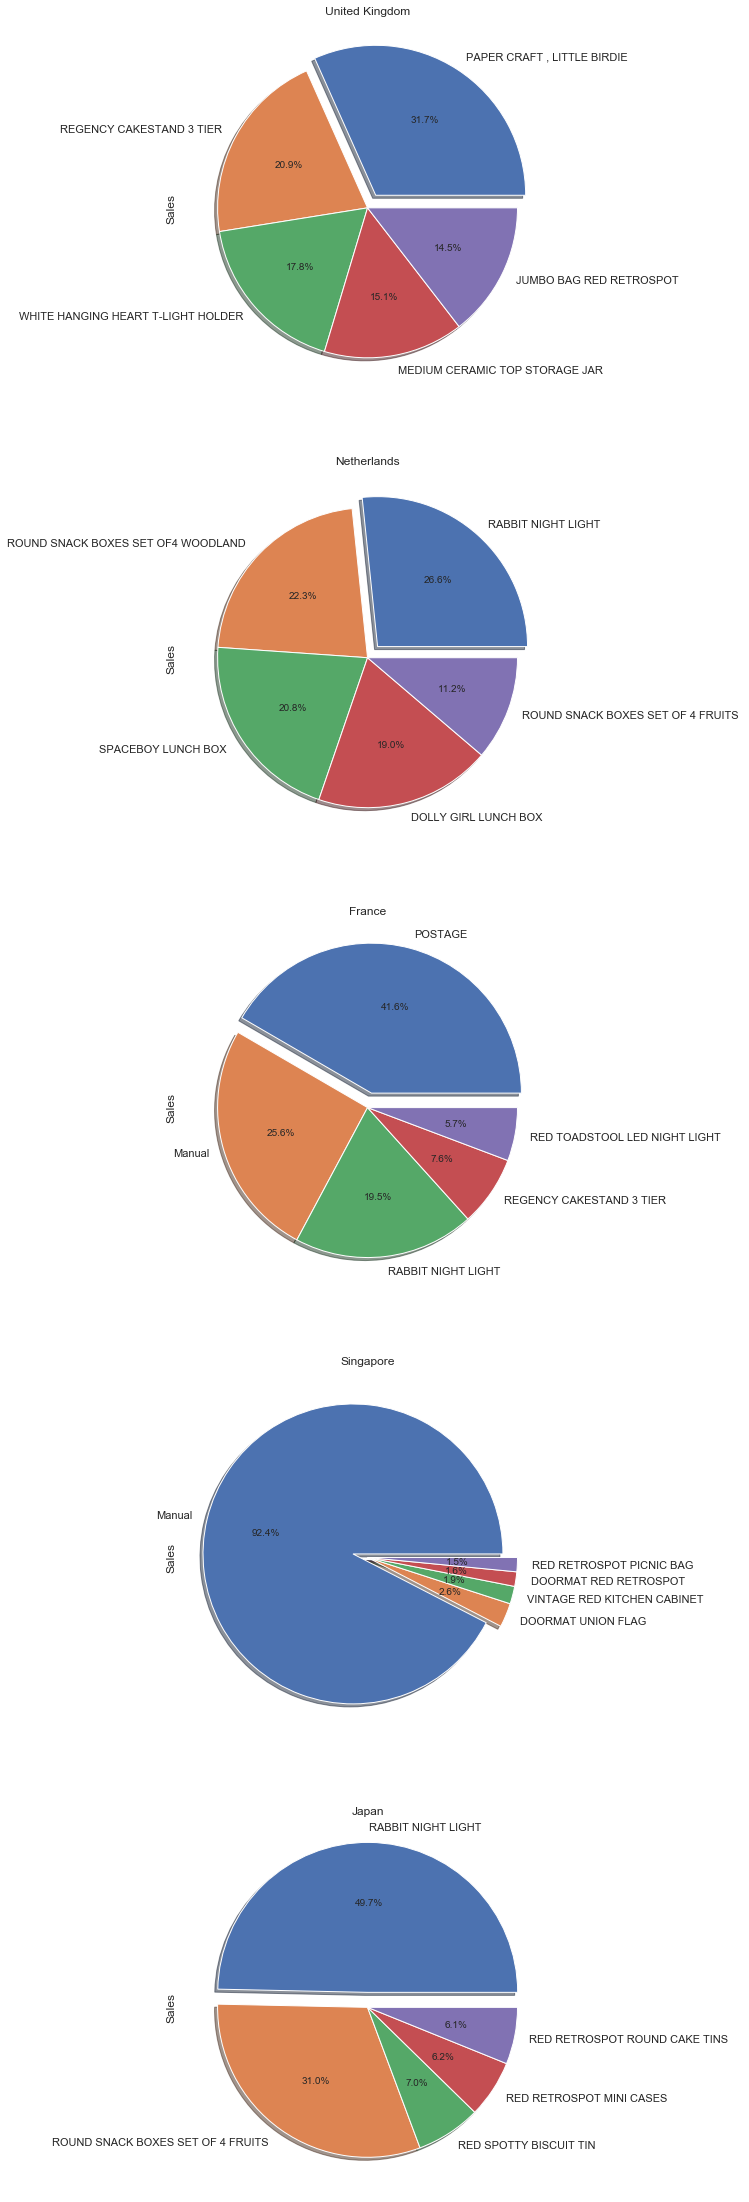

In [407]:
fig, ax = plt.subplots(5, 1, figsize=(20, 40))
ax[0].set_title(top_five[0])
UK_description_sales["Sales"].plot.pie(explode=[0.1,0,0,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[1].set_title(top_five[1])
NL_description_sales["Sales"].plot.pie(explode=[0.1,0,0,0,0],autopct='%1.1f%%',ax=ax[1],shadow=True)

ax[2].set_title(top_five[2])
France_description_sales["Sales"].plot.pie(explode=[0.1,0,0,0,0],autopct='%1.1f%%',ax=ax[2],shadow=True)

ax[3].set_title(top_five[3])
Singapore_description_sales["Sales"].plot.pie(explode=[0.1,0,0,0,0],autopct='%1.1f%%',ax=ax[3],shadow=True)

ax[4].set_title(top_five[4])
Japan_description_sales["Sales"].plot.pie(explode=[0.1,0,0,0,0],autopct='%1.1f%%',ax=ax[4],shadow=True)

plt.show()